In [179]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import mpl_toolkits.mplot3d
import sys,os
sys.path.append(os.getcwd()+'/A5lib')
from A5lib import utils as a5ut
import importlib
importlib.reload(a5ut)

<module 'A5lib.utils' from '/Users/huangrong/Private/Hui/Sweden/LNU/S2/DeepLearning/Assignment/Main/A5lib/utils.py'>

## Setting the scene

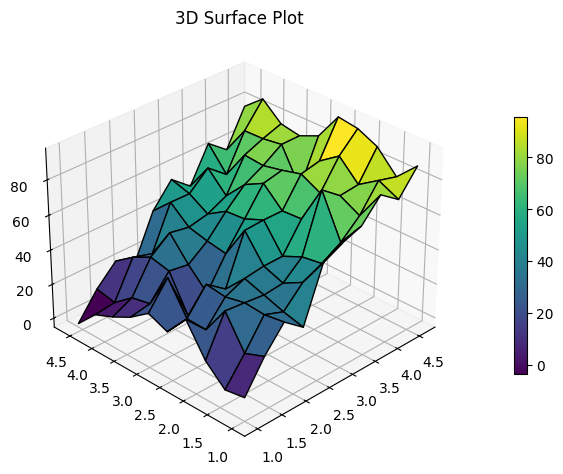

In [180]:
np.random.seed(1)

# Parameters
N = 4
a10 = 20
a20 = -3

## Generate full-fatorial design and reverse columns
XX = np.array(list(itertools.product(range(1, N + 1), repeat=2)))[::-1]

X1 = XX[:, 0]
X2 = XX[:, 1]

## define functions
f0 = lambda x1, x2: a10 * x1 + a20 * x2
f = lambda x1, x2, r: f0(x1, x2) + r

## Generate random noise
R = np.random.normal(0, 10, N*N)

# Compute Y values
Y = np.array([f(x1, x2, r) for x1, x2, r in zip(X1, X2, R)])

A, B = np.meshgrid(np.arange(1, N + 1, N / 10), np.arange(1, N + 1, N / 10))

# Plotting function
ff = lambda x1, x2: f(x1, x2, np.random.normal(0, 10))

a5ut.plot3d(ff, A, B)
plt.show()

In [181]:
m1 = lambda ws, x: ws[0] * x[0] + ws[1] * x[1]
mse1 = lambda ws: a5ut.mse(ws, m1, XX, Y)

In [182]:
import numpy as np

# Input and output dimensions
_in = 2
_out = 1

# Calculate the limit for the Glorot uniform initializer
_limit = np.sqrt(6 / (_in + _out))

# Initialize weights using Glorot uniform distribution
ws0 = np.random.uniform(-_limit, _limit, size=(2,))



In [183]:
mse1(ws0)

np.float64(2052.0393350630056)

In [184]:
gradients1 = [
    lambda ws, x: x[0],  # First gradient function returns the first element of x
    lambda ws, x: x[1]   # Second gradient function returns the second element of x
]


ws: [0.33928601 0.9304985 ] type: <class 'numpy.ndarray'>
old_ws: [0.33928601 0.9304985 ] type: <class 'numpy.ndarray'>
grad_ws: [-238.97809639 -189.22165653] type: <class 'numpy.ndarray'>
Iteration 0, MSE: 2038.1304277301754, Weights: [0.37513272 0.95888175]
ws: [0.37513272 0.95888175] type: <class 'numpy.ndarray'>
old_ws: [0.37513272 0.95888175] type: <class 'numpy.ndarray'>
grad_ws: [-238.08560507 -188.34782388] type: <class 'numpy.ndarray'>
Iteration 1, MSE: 2024.3346430248139, Weights: [0.41084556 0.98713392]
ws: [0.41084556 0.98713392] type: <class 'numpy.ndarray'>
old_ws: [0.41084556 0.98713392] type: <class 'numpy.ndarray'>
grad_ws: [-237.19676029 -187.47763076] type: <class 'numpy.ndarray'>
Iteration 2, MSE: 2010.651050651793, Weights: [0.44642508 1.01525557]
ws: [0.44642508 1.01525557] type: <class 'numpy.ndarray'>
old_ws: [0.44642508 1.01525557] type: <class 'numpy.ndarray'>
grad_ws: [-236.31154702 -186.61106217] type: <class 'numpy.ndarray'>
Iteration 3, MSE: 1997.078727974

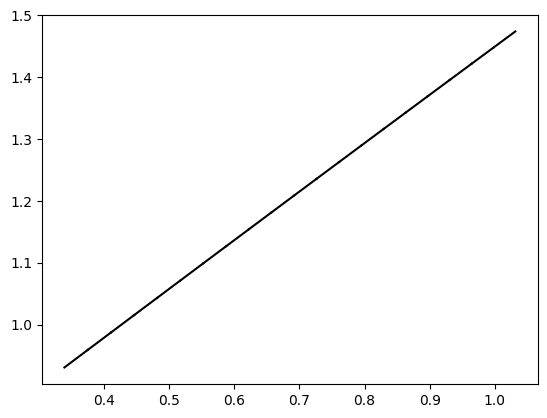

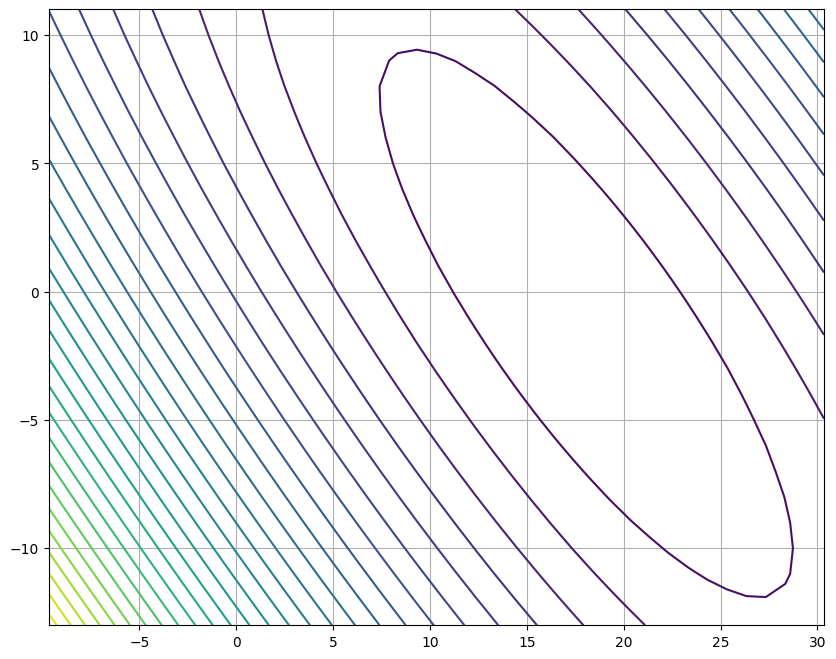

In [ ]:

f = lambda a, b: mse1([a, b])

# Create the meshgrid
a_min = min(a10, ws0[0]) - 10
a_max = max(a10, ws0[0]) + 10
b_min = min(a20, ws0[1]) - 10
b_max = max(a20, ws0[1]) + 10
A, B = np.meshgrid(np.arange(a_min, a_max+1), np.arange(b_min, b_max+1))

Z = a5ut.mse([A, B], m1, XX, Y)


grad_loss = lambda ws: a5ut.grad_mse(ws, m1, gradients1, XX, Y)


# Run gradient descent
K = 20
learning_eps = 0.00015


ws, history = a5ut.grad_desc_mse(
    K,
    ws0,
    learning_eps,
    mse1,
    grad_loss,
    verbose=True
)


plt.figure(figsize=(10, 8))
contours = plt.contour(A, B, Z, levels=30)
plt.grid(True)
plt.show()

